In [1]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

from __future__ import annotations
import re
from egglog import *

In [5]:
egraph = EGraph()

In [6]:
@egraph.class_
class Num(BaseExpr):
    def __init__(self, value: i64Like) -> None:
        ...

    @classmethod
    def var(cls, name: StringLike) -> Num:  # type: ignore[empty-body]
        ...

    def __add__(self, other: Num) -> Num:  # type: ignore[empty-body]
        ...

    def __mul__(self, other: Num) -> Num:  # type: ignore[empty-body]
        ...

In [7]:
# expr1 = (x + (x + (x + (x + x)))))
expr1 = egraph.define("expr1", Num.var("x") + (Num.var("x") + (Num.var("x") + (Num.var("x") + Num.var("x")))))
# # expr2 = 5 * x
# expr2 = egraph.define("expr2", Num(5) * Num.var("x"))

In [8]:
a, b, c = vars_("a b c", Num)
i, j = vars_("i j", i64)
egraph.register(
    rewrite(a + b).to(b + a),
    rewrite(a * (b + c)).to((a * b) + (a * c)),
    rewrite(Num(i) + Num(j)).to(Num(i + j)),
    rewrite(Num(i) * Num(j)).to(Num(i * j)),
    rewrite(a + a).to(a * Num(2)),
    rewrite(a + a * Num(i)).to(a * Num(i + 1)),
    rewrite(a * Num(i)).to(Num(i) * a)
)

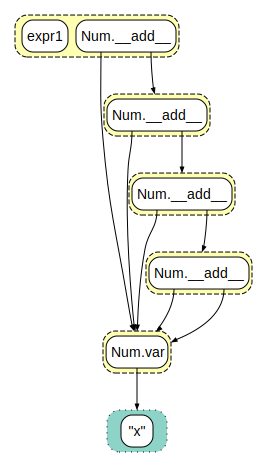

In [9]:
egraph

In [10]:
egraph.extract(expr1)

Num.var("x") + (Num.var("x") + (Num.var("x") + (Num.var("x") + Num.var("x"))))

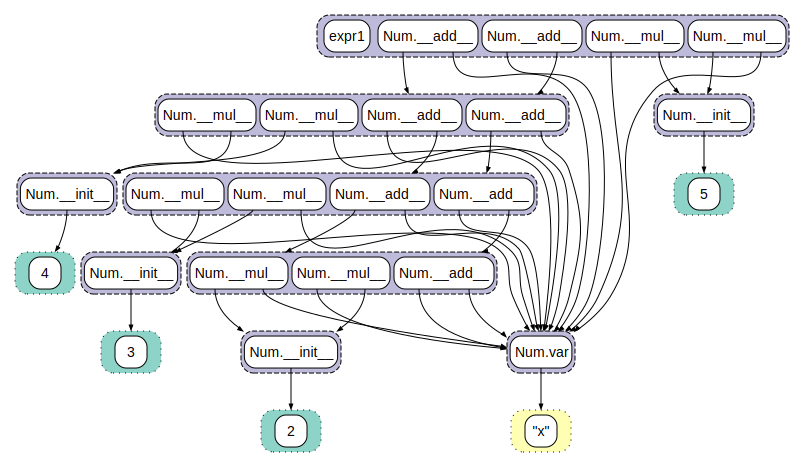

In [11]:
egraph.run(10)
# egraph.check(eq(expr1).to(expr2))
egraph

In [12]:
egraph.extract(expr1)

Num.var("x") * Num(5)

In [120]:
egraph = EGraph()


@egraph.class_
class Num(BaseExpr):
    def __init__(self, value: i64Like) -> None:
        ...

    @classmethod
    def var(cls, name: StringLike) -> Num:  # type: ignore[empty-body]
        ...

    def __add__(self, other: Num) -> Num:  # type: ignore[empty-body]
        ...

    def __mul__(self, other: Num) -> Num:  # type: ignore[empty-body]
        ...


a, b, c = vars_("a b c", Num)
i, j = vars_("i j", i64)
egraph.register(
    rewrite(Num(i) + Num(j)).to(Num(i + j)),
    rewrite(Num(i) * Num(j)).to(Num(i * j)),
    rewrite(Num(i) + a).to(a + Num(i)),
    rewrite(a * Num(i)).to(Num(i) * a),

    rewrite(a + (b + c)).to((a + b) + c),
    rewrite(a * (b + c)).to((a * b) + (a * c)),
    rewrite(a + a).to(a * Num(2)),
    rewrite(a + a * Num(i)).to(a * Num(i + 1)),
)

In [4]:
from egglog.runtime import RuntimeExpr


def to_expr(x: str) -> RuntimeExpr:
    assert (len(x) > 0)
    expr = Num.var(x[-1])
    for c in x[-2::-1]:
        expr = Num.var(c) + expr
    return expr

In [122]:
input = 'AAACCCAAACCCAAACCCAAACCC'
expr1 = egraph.define("expr1", to_expr(input))

In [123]:
egraph.extract(expr1)

Num.var("A") + (
    Num.var("A")
    + (
        Num.var("A")
        + (
            Num.var("C")
            + (
                Num.var("C")
                + (
                    Num.var("C")
                    + (
                        Num.var("A")
                        + (
                            Num.var("A")
                            + (
                                Num.var("A")
                                + (
                                    Num.var("C")
                                    + (
                                        Num.var("C")
                                        + (
                                            Num.var("C")
                                            + (
                                                Num.var("A")
                                                + (
                                                    Num.var("A")
                                                    + (
                                  

(Num(3) * (Num.var("A") + Num.var("C"))) * Num(4)


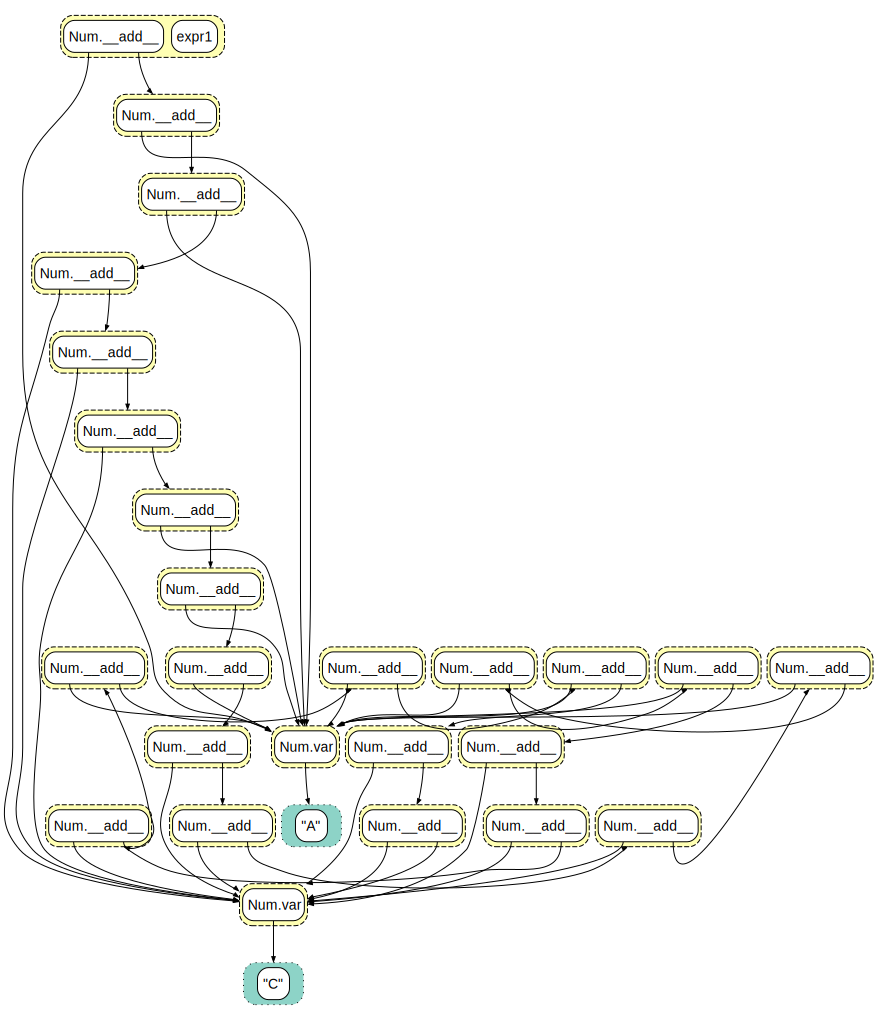

In [124]:
print(egraph.simplify(expr1, 10))
egraph

NotImplementedError: Not imeplemented yet, because there are no examples in the egglog repo

In [2]:
egraph = EGraph()


# @egraph.class_
# class Num(BaseExpr):
#     def __init__(self, value: i64Like) -> None:
#         ...
#
#     def __add__(self, other: Num) -> Num:  # type: ignore[empty-body]
#         ...
#
#     def __mul__(self, other: Num) -> Num:  # type: ignore[empty-body]
#         ...
#     def __mul__(self, other: Nuc) -> Nuc:  # type: ignore[empty-body]
#         ...

@egraph.class_
class Nuc(BaseExpr):
    def __init__(self, value: StringLike) -> None:
        ...

    def __add__(self, other: Nuc) -> Nuc:  # type: ignore[empty-body]
        ...

    def __mul__(self, other: i64) -> Nuc:  # type: ignore[empty-body]
        ...


# x, y, z = vars_("x y z", Num)
i, j = vars_("i j", i64)
a, b, c = vars_("a b c", Nuc)
s, t, r = vars_("s t r", String)
egraph.register(
    # rewrite(x + y).to(y + x),
    # rewrite(x * y).to(y * x),
    # rewrite(x + (y + z)).to((x + y) + z),
    # rewrite(x * (y + z)).to((x * y) + (x * z)),
    # rewrite(Num(i) + Num(j)).to(Num(i + j)),
    # rewrite(Num(i) * Num(j)).to(Num(i * j)),
    # rewrite(a * i).to(i * a),

    rewrite(a + a).to(a * i64(2)),
    rewrite(a + a * i).to(a * (i + 1)),
    rewrite(a + (b + c)).to((a + b) + c),
)

from egglog.runtime import RuntimeExpr


def to_expr(x: str) -> RuntimeExpr:
    assert (len(x) > 0)
    expr = Nuc(x[-1])
    for c in x[-2::-1]:
        expr = Nuc(c) + expr
    return expr

In [117]:
input = 'AAACCCAAACCCTTAAACCCAAACCCTT'
input2 = "ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG"
input3 = input2  #[:150]
expr1 = egraph.define("expr1", to_expr(input3))
expr1

expr1

In [119]:
%%time
expr2 = egraph.simplify(expr1, 6)
#expr2

CPU times: total: 8.16 s
Wall time: 11.9 s


In [120]:
import re

input_string = str(expr2).replace(' ', '').replace('\n', '')
output_string = re.sub(r'Nuc\("([ACGT])"\)', r'\1', input_string)

print(output_string)

((A+T)+(G+(((C*4)+(((A*2)+C)+T))+((A*3)+(T+A)))))+(((((((C*2)+G)*2)+(T+A))+(T+(G+(A+C))))+((((C*2)+A)*2)+(((T+(A*2))+(T*2))+A)))+(((((((C*5)+(A+(T+A)))+(C+(T+(C*2))))+(T+G))+((A+C)*2))+(((T+A)+((T*2)+(((T+C)*2)+G)))+(T+(C+(A+(C*3))))))+(((((A*2)+(C+(((T+(A*4))+((A+T)*2))+(T+(A*3)))))+((((T*2)+(C+(A*3)))+(T*2))+A))+(((C*2)+(A+(T+(C+(T+((A+(C*6))+T))))))+(C+((((A+(C*2))+(A*4))+(C*3))+A))))+(((T+(A*5))*2)+(((A+(C+(T+(A+(C+(A*2))))))+((T+(((A*3)+((C*3)+T))+(((G+A)*2)+A)))+((((C*2)+(A*4))+T)+((G+(A*2))+(C+G)))))+((((A*4)+((T+C)+(T+(A+((((T*2)+C)+(G+C))+((T*2)+C))))))+((((A+(T*2))+C)+((G+C)+(T+((G+(C*4))+((C+A)*2)))))+(A+T)))+((C*2)+(T+(A+G)))))))))


In [7]:
def toRPN(s: str) -> str:
    priority = {"+": 1, "-": 1, "*": 2, "/": 2, "^": 3, "(": -1, ")": 0}
    right_associative_operators = {"^"}
    li = []
    ops = ["+", "-", "*", "/", "(", ")", "^"]
    result = ""
    for i in s:
        if i in ops:
            if i == "(":
                li.append(i)
            else:
                while li and (
                        priority[li[-1]] > priority[i] or
                        priority[li[-1]] == priority[i] and i not in right_associative_operators
                ):
                    result += li.pop()
                if i == ')':
                    li.pop()
                else:
                    li.append(i)
        else:
            result += i

    while li:
        result += li.pop()

    return result

In [122]:
output_string

'((A+T)+(G+(((C*4)+(((A*2)+C)+T))+((A*3)+(T+A)))))+(((((((C*2)+G)*2)+(T+A))+(T+(G+(A+C))))+((((C*2)+A)*2)+(((T+(A*2))+(T*2))+A)))+(((((((C*5)+(A+(T+A)))+(C+(T+(C*2))))+(T+G))+((A+C)*2))+(((T+A)+((T*2)+(((T+C)*2)+G)))+(T+(C+(A+(C*3))))))+(((((A*2)+(C+(((T+(A*4))+((A+T)*2))+(T+(A*3)))))+((((T*2)+(C+(A*3)))+(T*2))+A))+(((C*2)+(A+(T+(C+(T+((A+(C*6))+T))))))+(C+((((A+(C*2))+(A*4))+(C*3))+A))))+(((T+(A*5))*2)+(((A+(C+(T+(A+(C+(A*2))))))+((T+(((A*3)+((C*3)+T))+(((G+A)*2)+A)))+((((C*2)+(A*4))+T)+((G+(A*2))+(C+G)))))+((((A*4)+((T+C)+(T+(A+((((T*2)+C)+(G+C))+((T*2)+C))))))+((((A+(T*2))+C)+((G+C)+(T+((G+(C*4))+((C+A)*2)))))+(A+T)))+((C*2)+(T+(A+G)))))))))'

In [123]:
len(output_string)

651

In [124]:
toRPN(output_string)

'AT+GC4*A2*C+T++A3*TA+++++C2*G+2*TA++TGAC++++C2*A+2*TA2*+T2*+A+++C5*ATA+++CTC2*+++TG++AC+2*+TA+T2*TC+2*G+++TCAC3*+++++A2*CTA4*+AT+2*+TA3*++++T2*CA3*++T2*+A++C2*ATCTAC6*+T++++++CAC2*+A4*+C3*+A++++TA5*+2*ACTACA2*+++++TA3*C3*T++GA+2*A+++C2*A4*+T+GA2*+CG+++++A4*TC+TAT2*C+GC++T2*C++++++AT2*+C+GC+TGC4*+CA+2*++++AT+++C2*TAG++++++++++'

In [125]:
len(toRPN(output_string))

327

In [126]:
rpn_output_string = toRPN(output_string)

In [127]:
len(rpn_output_string), len(rpn_output_string) * 3 / 8

(327, 122.625)

In [131]:
len(input3), len(rpn_output_string) * 3 / 8, len(input3) / (len(rpn_output_string) * 3 / 8), len(input3) / (
            len(huffman_encode(rpn_output_string)) // 8), len(input3) / (len(huffman_encode(input3)) // 8)

(207, 122.625, 1.688073394495413, 1.8157894736842106, 4.224489795918367)

In [8]:
from collections import Counter


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

In [29]:
len(string), len(string_compressed) // 8, len(string) / (len(string_compressed) // 8)

(100, 24, 4.166666666666667)

In [9]:
def huffman_encode(input: str) -> str:
    freq = dict(Counter(input))
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    node = make_tree(freq)
    encoding = huffman_code_tree(node)
    #for i in encoding:
    #    print(f'{i} : {encoding[i]}')
    return ''.join([encoding[c] for c in input])

In [111]:
string_compressed = huffman_encode(rpn_output_string)
string_compressed

'1000110001001000011110111100001101010110111111111000000101011100010001101000101100110101110011111111111101100010100010110100011011001100110111111101110000110111011001101111001101000011011011000111111111110001001101000110101100010100010110011011111111111110111000110011010110101100110111000100111111111101010001000001011111100001101010011100000111101111111111111100011110011010111000000101110110011011101010000001010110011011110001000110111111111100011010111101110001000011001010110101111111111111111100010001101100000111101110100000101111110011011100000110110111001101100010011100010100001101111111111101110000001011101000001011111111111111111'

In [113]:
string_compressed = huffman_encode(rpn_output_string)
len(string), len(string_compressed) // 8, len(string) / (len(string_compressed) // 8)

(100, 80, 1.25)

In [30]:
egraph = EGraph()


@egraph.class_
class Nuc(BaseExpr):
    def __init__(self, value: StringLike) -> None:
        ...

    def __add__(self, other: Nuc) -> Nuc:  # type: ignore[empty-body]
        ...

    def __mul__(self, other: i64) -> Nuc:  # type: ignore[empty-body]
        ...


i, j = vars_("i j", i64)
a, b, c = vars_("a b c", Nuc)
# s, t, r = vars_("s t r", String)
egraph.register(
    rewrite(a + a).to(a * i64(2)),
    rewrite(a + a * i).to(a * (i + 1)),
    rewrite(a + (b + c)).to((a + b) + c),
    rewrite((a * i) * j).to(a * (i * j)),
    # rewrite((a + b * i) * j).to(a * j + b * (i * j)),
    rewrite(a * i + b * i * j).to((a + b * j) * i),
)

In [31]:
chimpanzee_dna = "ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG"
input = chimpanzee_dna  #[:100]
to_binary = {
    'A': '00',
    'C': '01',
    'G': '10',
    'T': '11'
}
binary_input = ''.join([to_binary[c] for c in input])
expr_input = egraph.define("expr_input", to_expr(input))
# expr_binary_input = egraph.define("expr_binary_input", to_expr(binary_input))

In [32]:
%%time
expr_sim_expr_input = egraph.simplify(expr_input, 5)
# expr_sim_expr_binary_input = egraph.simplify(expr_binary_input, 5)
#expr2

CPU times: total: 578 ms
Wall time: 1.08 s


In [33]:
expr_sim_expr_input

((Nuc("A") + ((Nuc("T") + (Nuc("G") + (Nuc("C") * 4))) + (Nuc("A") * 2))) + (Nuc("C") + (Nuc("T") + (Nuc("A") * 3)))) + (
    ((((Nuc("T") + Nuc("A")) + (((Nuc("C") * 2) + Nuc("G")) * 2)) + (Nuc("T") + (Nuc("A") + (Nuc("T") + Nuc("G"))))) + ((Nuc("A") + Nuc("C")) + (((Nuc("C") * 2) + Nuc("A")) * 2)))
    + (
        (
            ((((Nuc("T") + (Nuc("A") * 2)) + (Nuc("T") * 2)) + Nuc("A")) + (Nuc("C") * 5))
            + (((Nuc("A") + (Nuc("T") + (Nuc("A") + (Nuc("C") + Nuc("T"))))) + ((Nuc("C") * 2) + (Nuc("T") + (Nuc("G") + ((Nuc("A") + Nuc("C")) * 2))))) + (Nuc("T") + Nuc("A")))
        )
        + (
            (
                ((((Nuc("T") * 2) + ((Nuc("T") + Nuc("C")) * 2)) + (Nuc("G") + Nuc("T"))) + ((Nuc("C") + (Nuc("A") + (Nuc("C") * 3))) + ((Nuc("A") * 2) + Nuc("C"))))
                + ((Nuc("T") + (Nuc("A") * 4)) + ((Nuc("A") + Nuc("T")) * 2))
            )
            + (
                (Nuc("T") + (((((Nuc("A") * 3) + (Nuc("T") * 2)) + Nuc("C")) + (((Nuc("A") * 3) + (Nu

In [34]:

rpn_output_string = toRPN(
    re.sub(r'Nuc\("([ACTG])"\)', r'\1', str(expr_sim_expr_input).replace(' ', '').replace('\n', '')))
print(rpn_output_string)
#
# rpn_output_binary_string = toRPN(
#     re.sub(r'Nuc\("([01])"\)', r'\1', str(expr_sim_expr_binary_input).replace(' ', '').replace('\n', '')))
#
# print(rpn_output_binary_string)

ATGC4*++A2*++CTA3*+++TA+C2*G+2*+TATG++++AC+C2*A+2*++TA2*+T2*+A+C5*+ATACT++++C2*TGAC+2*++++TA+++T2*TC+2*+GT++CAC3*++A2*C+++TA4*+AT+2*++TA3*T2*+C+A3*T2*+A++C2*A+++TCTA+++C6*T++CA++C2*A4*+C3*A+++TA5*+2*AC+TACA2*+++TA3*+++C3*T+GA+2*+AC2*A4*+TG++++A2*C+GA4*+TC+++TA+T2*C+G++C+T2*C+A+++T2*C+GC++TGC4*+++CA+2*ATC2*++TAG+++++++++++++++


In [35]:
from tabulate import tabulate
import math

input_len = len(input)
binary_input_len = int(math.ceil(len(binary_input) / 8))
compressed_packed_len = int(math.ceil(len(rpn_output_string) * 3 / 8))
compressed_huffman_len = int(math.ceil(len(huffman_encode(rpn_output_string)) / 8))
# binary_compressed_packed_len = int(math.ceil(len(rpn_output_binary_string) * 3 / 8))
# binary_compressed_huffman_len = int(math.ceil(len(huffman_encode(rpn_output_binary_string)) / 8))
huffman_len = int(math.ceil(len(huffman_encode(input)) / 8))

data = sorted([
    ['Original', input_len, 1],
    ['Compressed_packed', compressed_packed_len, input_len / compressed_packed_len],
    ['Compressed_huffman', compressed_huffman_len, input_len / compressed_huffman_len],
    # ['Binary Compressed_packed', binary_compressed_packed_len, input_len / binary_compressed_packed_len],
    # ['Binary Compressed_huffman', binary_compressed_huffman_len, input_len / binary_compressed_huffman_len],
    ['Binary Original', binary_input_len, input_len / binary_input_len],
    ['Huffman', huffman_len, input_len / huffman_len],
], key=lambda x: x[2])

print(tabulate(data, headers=["Solution", "Len (in bytes)", "Compression Ration"], tablefmt="outline", floatfmt=".2f"))

+--------------------+------------------+----------------------+
| Solution           |   Len (in bytes) |   Compression Ration |
+====================+==================+======================+
| Original           |              207 |                 1.00 |
| Compressed_packed  |              123 |                 1.68 |
| Compressed_huffman |              115 |                 1.80 |
| Binary Original    |               52 |                 3.98 |
| Huffman            |               50 |                 4.14 |
+--------------------+------------------+----------------------+


In [39]:
input = chimpanzee_dna  #[:100]
to_number = {
    'A': '0',
    'C': '1',
    'G': '2',
    'T': '3'
}
number_input = ''.join([to_number[c] for c in input])
number_input

'032111100130003011211230320111011030033011111030131132010130333131231011100130000030330003310003301103130111111310110000111030000030000001301003000111320200110000320012000031303312133103312132111110100311302'

In [41]:
number_input2 = [int(number_input[i]) - int(number_input[i - 1]) for i in range(1, len(number_input))]
number_input2

[3,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 2,
 -3,
 0,
 0,
 3,
 -3,
 1,
 0,
 1,
 -1,
 0,
 1,
 1,
 -3,
 3,
 -1,
 -2,
 1,
 0,
 0,
 -1,
 1,
 0,
 -1,
 3,
 -3,
 0,
 3,
 0,
 -3,
 1,
 0,
 0,
 0,
 0,
 -1,
 3,
 -3,
 1,
 2,
 -2,
 0,
 2,
 -1,
 -2,
 1,
 -1,
 1,
 2,
 -3,
 3,
 0,
 0,
 -2,
 2,
 -2,
 1,
 1,
 -2,
 -1,
 1,
 0,
 0,
 -1,
 0,
 1,
 2,
 -3,
 0,
 0,
 0,
 0,
 3,
 -3,
 3,
 0,
 -3,
 0,
 0,
 3,
 0,
 -2,
 -1,
 0,
 0,
 3,
 0,
 -3,
 1,
 0,
 -1,
 3,
 -2,
 2,
 -3,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 -2,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 3,
 -3,
 0,
 0,
 0,
 0,
 3,
 -3,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 -3,
 1,
 -1,
 0,
 3,
 -3,
 0,
 0,
 1,
 0,
 0,
 2,
 -1,
 -2,
 2,
 -2,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 3,
 -1,
 -2,
 0,
 1,
 1,
 -2,
 0,
 0,
 0,
 3,
 -2,
 2,
 -3,
 3,
 0,
 -2,
 1,
 -1,
 2,
 0,
 -2,
 -1,
 3,
 0,
 -2,
 1,
 -1,
 2,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 -1,
 0,
 3,
 -2,
 0,
 2,
 -3,
 2]

In [ ]:
# TODO: rewrite to reference based approach, extend that with boolean (and, or, xor, not) and arithmetic (+, -, *, /) functions